In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install opencv-python # 我居然没有这个...

Note: you may need to restart the kernel to use updated packages.


## Test with 1 picture
I decide to try with text-based watermark first, use cat_37

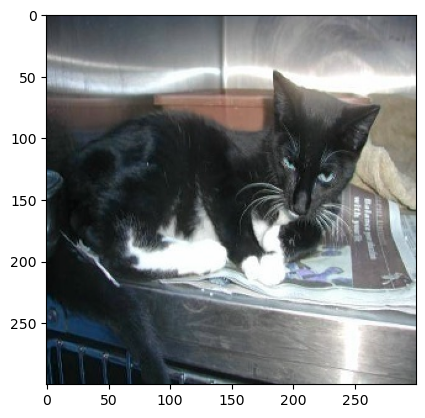

In [3]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("cat_37.jpg") 
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
blank_img = np.zeros((RGB_img.shape[0], RGB_img.shape[1], 3), dtype=np.uint8) # Create an empty image with this size, which is 300 * 300 here
font = cv2.FONT_HERSHEY_PLAIN  # This can be adjusted to a thinner font, I just find this one fine

cv2.putText(blank_img, text='EN.553.493', org=(40, 90), fontFace=font, fontScale=1.4, 
            color=(255, 255, 255), thickness=2, lineType=cv2.LINE_4)  # color white
blended = cv2.addWeighted(src1=RGB_img, alpha=0.5, src2=blank_img, beta=1, gamma=2)

cv2.imshow("Watermarked Image", blended)

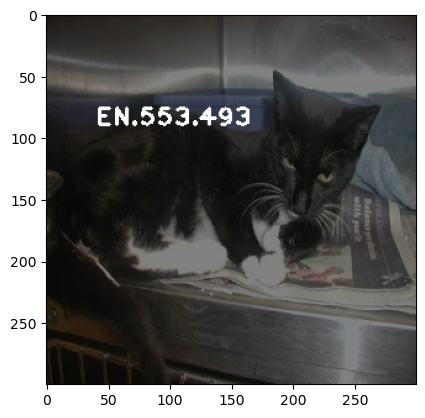

In [5]:
plt.imshow(blended)
plt.show()
# Works for one

In [6]:
# Summarize above as a function
def addWatermark(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Image is none. ")
        return
    
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # sometimes needed
    
    blank_img = np.zeros((RGB_img.shape[0], RGB_img.shape[1], 3), dtype=np.uint8)
    font = cv2.FONT_HERSHEY_PLAIN
    cv2.putText(blank_img, text='EN.553.493', org=(40, 90), fontFace=font, fontScale=1.4, 
                color=(255, 255, 255), thickness=2, lineType=cv2.LINE_4)
    
    blended = cv2.addWeighted(src1=RGB_img, alpha=0.5, src2=blank_img, beta=1, gamma=2)
    # cv2.imwrite(output_path, cv2.cvtColor(blended, cv2.COLOR_RGB2BGR))
    
    plt.imshow(blended)
    # plt.axis('off')
    # plt.show()

In [41]:
addWatermark('cat_37.jpg') # works! 

Image is none. 


[ WARN:0@615.847] global loadsave.cpp:248 findDecoder imread_('cat_37.jpg'): can't open/read file: check file path/integrity


In [8]:
# Saves instead of display
def addWatermarkAndSave(image_path, output_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Image is none. ")
        return
    
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # sometimes needed
    
    blank_img = np.zeros((RGB_img.shape[0], RGB_img.shape[1], 3), dtype=np.uint8)
    font = cv2.FONT_HERSHEY_PLAIN
    cv2.putText(blank_img, text='EN.553.493', org=(40, 90), fontFace=font, fontScale=1.4, 
                color=(255, 255, 255), thickness=2, lineType=cv2.LINE_4)
    
    blended = cv2.addWeighted(src1=RGB_img, alpha=0.5, src2=blank_img, beta=1, gamma=2)
    gray_img = cv2.cvtColor(blended, cv2.COLOR_RGB2GRAY)

    os.chdir(output_path)
    print("Before saving image:")   
    print(os.listdir(output_path))   
    filename = 'savedImage.jpg'
    cv2.imwrite(filename, img) 
 
    print("After saving image:")   
    print(os.listdir(output_path)) 
  
    print('Successfully saved') 
    print("Saved grayscale watermarked image to:", output_path)
    # Format finds from https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/

In [9]:
import os

In [10]:
addWatermarkAndSave('cat_37.jpg', '/Users/xinmingshen_1/Desktop/test') # works! 

Before saving image:
['.DS_Store']
After saving image:
['.DS_Store', 'savedImage.jpg']
Successfully saved
Saved grayscale watermarked image to: /Users/xinmingshen_1/Desktop/test


In [11]:
import os

In [26]:
count = 0
limit = 10
for filename in os.listdir('/Users/xinmingshen_1/Desktop/cat-50'):
        if filename.lower().endswith(('.jpg')):
            if count >= limit:
                break 
            image_path = os.path.join('/Users/xinmingshen_1/Desktop/test' + filename)
            output_filename = filename.rsplit('.', 1)[1] + '.jpg'  # Ensures output is JPG
            
            output_path = os.path.join('/Users/xinmingshen_1/Desktop/test', output_filename)
            addWatermarkAndSave('/Users/xinmingshen_1/Desktop/cat-50', '/Users/xinmingshen_1/Desktop/test')
            count += 1

Image is none. 
Image is none. 
Image is none. 
Image is none. 
Image is none. 
Image is none. 
Image is none. 
Image is none. 
Image is none. 
Image is none. 


In [16]:
# Do this for 50 images
def process_directory(input_dir, output_dir, limit=5):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    count = 0

    for filename in os.listdir(input_dir):
        if filename.lower().endswith(('.jpg')):
            if count >= limit:
                break 
            image_path = os.path.join(input_dir, filename)
            output_filename = filename.rsplit('.', 1)[0] + '.jpg'  # Ensures output is JPG
            
            output_path = os.path.join(output_dir, output_filename)
            addWatermarkAndSave(image_path, output_path)
            count += 1

    print(f"Processed and saved {count} images to {output_dir}")

In [17]:
input_directory = "/Users/xinmingshen_1/Desktop/cat-50"
output_directory = "/Users/xinmingshen_1/Desktop/test"
process_directory(input_directory, output_directory)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/xinmingshen_1/Desktop/test/cat.6.jpg'